# Assignment 2

The probability distribution function, for two classes $\omega_1$ and $\omega_2$ and unknown $\theta$ is $$p(x|\theta) = \frac{1}{\pi}\frac{1}{1+(x-\theta)^2} $$

It is also known that $P(\omega_1) = 7/12$ and $P(\omega_2) = 5/12$.

## Part 1

Design a Maximum Likelihood Estimator and estimate $\hat{\theta_1}$ and $\hat{\theta_2}$ for both classes, when $D_1 = [2.8, −0.4, −0.8, 2.3, −0.3, 3.6, 4.1]$ and $D_2 = [−4.5, −3.4, −3.1, −3.0, −2.3]$. Draw $log(p(D_1|\theta))$ and $log(p(D_2|\theta))$.

In [12]:
## Run this cell before anything else
import numpy as np
from scipy.constants import pi
import matplotlib.pyplot as plt

d1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
d2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])
a_priori_1 = 7 / 12
a_priori_2 = 5 / 12
dx = 0.001
theta_array = np.arange(-10, 10, dx)


/tmp/ipykernel_6774/3983456159.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  value = np.sum(np.log((1 / pi) * 1 / (1 + pow(x[i] - theta, 2))) for i in range(len(x)))


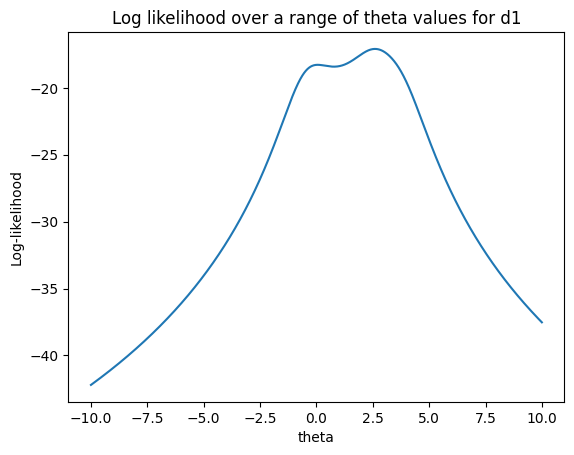

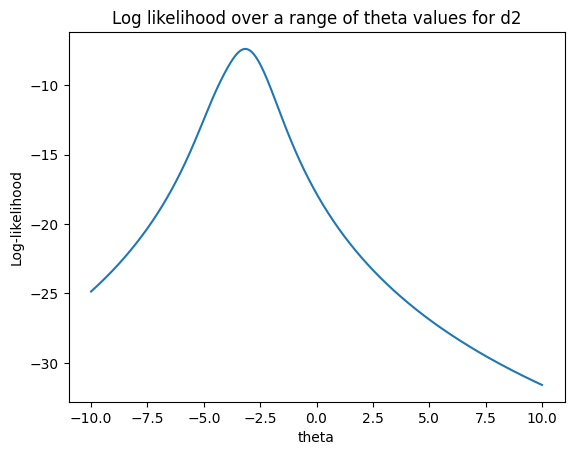

Estimation of theta 1:  2.599999999993017
Estimation of theta 2:  -3.1590000000037914


In [15]:
def log_likelihood(x, theta):
    value = np.sum(np.log((1 / pi) * 1 / (1 + pow(x[i] - theta, 2))) for i in range(len(x)))
    return value


def calculate_log_likelihood(theta_array, d):
    LL = []  # log likelihood
    for theta in theta_array:
        loglike = log_likelihood(d, theta)
        LL.append(loglike)
    return LL


logLikelihood1 = calculate_log_likelihood(theta_array, d1)
logLikelihood2 = calculate_log_likelihood(theta_array, d2)

plt.plot(theta_array, logLikelihood1)
plt.xlabel('theta')
plt.ylabel('Log-likelihood')
plt.title('Log likelihood over a range of theta values for d1')
plt.show()

plt.plot(theta_array, logLikelihood2)
plt.xlabel('theta')
plt.ylabel('Log-likelihood')
plt.title('Log likelihood over a range of theta values for d2')
plt.show()

best_theta_1 = theta_array[
    logLikelihood1.index(max(logLikelihood1))]  # Find the x value corresponding to the maximum y value
print("Estimation of theta 1: ", best_theta_1)

max_ll2 = max(logLikelihood2)  # Find the maximum y value
best_theta_2 = theta_array[
    logLikelihood2.index(max(logLikelihood2))]  # Find the x value corresponding to the maximum y value
print("Estimation of theta 2: ", best_theta_2)



### Question 2
Use the discriminant function $$g(x) = log(p(x|\hat{θ_1}) - log(p(x|\hat{θ_2}) + P(\omega_1) - P(\omega_2)$$
and classify the two sets of values. What can we conclude about the sign of g(x)? Describe the rule of decision.

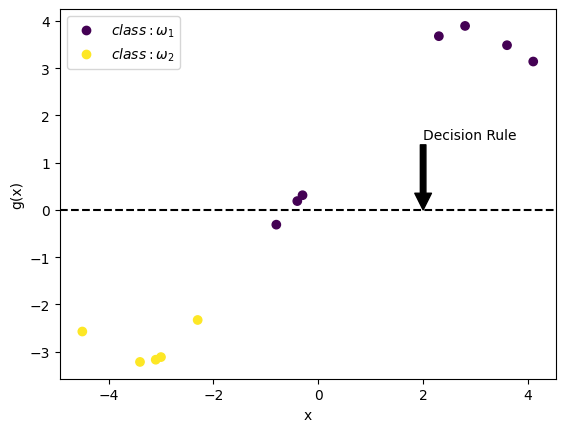

In [16]:
def probability_distribution(x, theta):
    value = (1 / pi) * 1 / (1 + pow(x - theta, 2))
    return value


def predict(d, theta_1, theta_2, a_priori_1, a_priori_2):
    class_1 = []
    class_2 = []
    values_class_1 = []
    values_class_2 = []
    for x in d:
        value = np.log(probability_distribution(x, theta_1)) - np.log(probability_distribution(x, theta_2)) + np.log(
            a_priori_1) - np.log(a_priori_2)
        if value > 0:
            class_1.append(x)
            values_class_1.append(value)
        else:
            class_2.append(x)
            values_class_2.append(value)
    return class_1, class_2, values_class_1, values_class_2


class_1, class_2, values_class_1, values_class_2 = predict(np.concatenate((d1, d2)), best_theta_1, best_theta_2,
                                                           a_priori_1, a_priori_2)


def color_assignment(given_class, d1, d2):
    color = []
    for i in range(np.size(given_class)):
        if given_class[i] in d1:
            color.append(0)
        elif given_class[i] in d2:
            color.append(1)
    return color


color_class_1 = color_assignment(class_1, d1, d2)
color_class_2 = color_assignment(class_2, d1, d2)

colors = np.concatenate((color_class_1, color_class_2))
labels = ['$ class: \omega_1$', '$ class: \omega_2$', '$ Decision rule']

fig, ax = plt.subplots()
scatter = ax.scatter([class_1, class_2], [values_class_1, values_class_2], c=colors)
ax.axhline(y=0, color="black", linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('g(x)')
ax.annotate("Decision Rule", xy=(2, 0), xytext=(2, 1.5), arrowprops=dict(facecolor='black', shrink=0.0001))
handles = scatter.legend_elements(num=[0, 1])[0]
ax.legend(handles=handles, labels=labels)
plt.show()


Discriminant function $g(x)$ classifies the results by splitting them into positive and negative values, thus it is shown as a straight line. We can reach this conclusion by following the equations below:
Rewritting function $g$ in respect to log function attributes $$log\frac{P(x|\hat{\theta_1})P(\omega_1)}{P(x|\hat{\theta_2})P(\omega_2)}$$

It is now clear that if the numerator is larger than the denominator, then the result is positive, and in any other case it's negative, since $$log(x)\geq 0 \; for \; x\in[1,\infty)$$

The combination of MLE classifier and this discriminant function misclassifies one value, by assigning it to a different class.

**It is important to note that MLE classifiers are notorious for becoming easily biased when there is minimal data at our disposal.**

## Part 2

In this part a Bayesian Classifier is designed for the estimation of the unknown parameter $\theta$.
The prior probability of $\theta$ is given by the following equation $$p(\theta) = \frac{1}{10\pi} \frac{1}{1+(\theta/10)^2}$$
Based on the Bayesian theory the a-posteriori probability $p(\theta|D)$ and the probability density function $P(x|D_j),j=1,2$ can be calculated.

### Question 1
Draw the a-posteriori probabilities $P(x|D_1)$ and $P(x|D_2)$. Compare them with $p(\theta)$.


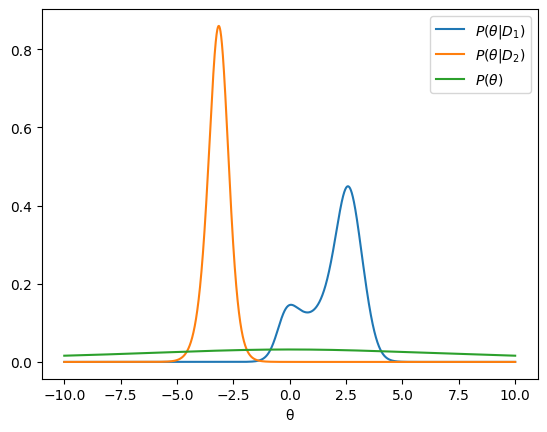

In [17]:
def likelihood(x, theta):
    x = [(1 / pi) * 1 / (1 + pow(x[i] - theta, 2)) for i in range(len(x))]
    value = np.prod(x)
    return value


def calculate_likelihood(theta_array, d):
    likelihood_list = []  # log likelihood
    for theta in theta_array:
        like = likelihood(d, theta)
        likelihood_list.append(like)
    return likelihood_list


def prior_distribution(theta_array):
    p_theta = []
    for theta in theta_array:
        value = (1 / (10 * pi)) * 1 / (1 + pow(theta / 10, 2))
        p_theta.append(value)
    return p_theta


def posterior_distribution(likelihood, p_theta, theta_array):
    numerator = np.multiply(likelihood, p_theta)
    denominator = np.trapz(numerator, x=theta_array)
    posterior = numerator / denominator
    return posterior


likelihood1 = calculate_likelihood(theta_array, d1)
likelihood2 = calculate_likelihood(theta_array, d2)
p_theta = prior_distribution(theta_array)
posterior1 = posterior_distribution(likelihood1, p_theta, theta_array)
posterior2 = posterior_distribution(likelihood2, p_theta, theta_array)

plt.plot(theta_array, posterior1)
plt.plot(theta_array, posterior2)
plt.plot(theta_array, p_theta)
plt.xlabel('θ')
plt.legend(['$ P(θ | D_1) $', '$ P(θ | D_2) $', '$ P(θ) $'])
plt.show()

### Question 3

Create a predict function that calculates the values of a discriminant function $$h(x) = log(P(x|D_1) - log(P(x|D_2) + P(\omega_1) - P(\omega_2)$$
Compare Bayes and MLE method for parameter estimation for this specific example.

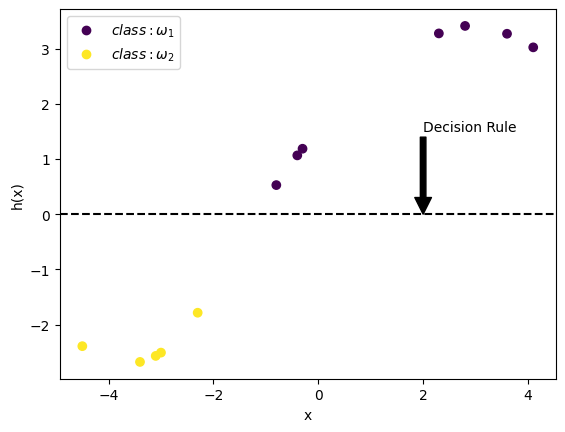

In [18]:
def probability_density_function(theta, d1, d2, posterior1, posterior2):
    prob_distr = []
    # one array to store distribution values, in order not to concatenate two arrays later.
    for x in d1:
        prob_distr.append(probability_distribution(x, theta))
    for x in d2:
        prob_distr.append(probability_distribution(x, theta))

    d1_pdf = np.trapz(np.multiply(prob_distr, posterior1), x=theta)
    d2_pdf = np.trapz(np.multiply(prob_distr, posterior2), x=theta)

    return d1_pdf, d2_pdf


d1_pdf, d2_pdf = probability_density_function(theta_array, d1, d2, posterior1, posterior2)


def predict_part2(d1_pdf, d2_pdf, priori_1, priori_2, d):
    class_1 = []
    class_2 = []
    values_class_1 = []
    values_class_2 = []
    for i in range(d1_pdf.shape[0]):
        discriminant_function = np.log(d1_pdf[i]) - np.log(d2_pdf[i]) + np.log(priori_1) - np.log(priori_2)
        if discriminant_function > 0:
            class_1.append(d[i])
            values_class_1.append(discriminant_function)
        else:
            class_2.append(d[i])
            values_class_2.append(discriminant_function)
    return class_1, class_2, values_class_1, values_class_2


class_1, class_2, values_class_1, values_class_2 = predict_part2(d1_pdf, d2_pdf, a_priori_1, a_priori_2,
                                                                 np.concatenate((d1, d2)))

color_class_1 = color_assignment(class_1, d1, d2)
color_class_2 = color_assignment(class_2, d1, d2)

colors = np.concatenate((color_class_1, color_class_2))

labels = ['$ class: \omega_1$', '$ class: \omega_2$']

fig, ax = plt.subplots()
scatter = ax.scatter(np.concatenate((class_1, class_2)), np.concatenate((values_class_1, values_class_2)), c=colors)
ax.axhline(y=0, color="black", linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('h(x)')
ax.annotate("Decision Rule", xy=(2, 0), xytext=(2, 1.5), arrowprops=dict(facecolor='black', shrink=0.0001))
handles = scatter.legend_elements(num=[0, 1])[0]
ax.legend(handles=handles, labels=labels)
plt.show()

# Comparing the models
Based on our theoretical knowledge, since we don't have enough data in our disposal, both models cannot be very reliable.
Taking that into account, the bayesian model achieves 100% accuracy in the classification of our dataset.
This is probably due to the Bayesian estimation’s incorporation of prior knowledge, which gives it the edge over the MLE classifier on this specific problem.
